In [118]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split

import sys
import os
sys.path.append(os.path.abspath('../../'))

from src.Simplex.SimplexAlgorithm import simplex_predict, rolling_simplex_forecast
from src.Datasets.SyntheticDataset import SimplePeriodicDataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

seq_len = 140                           # sequence length of each sample
n_timeseries = 1                        # number of multivariate time series
shift = 1                               # number of steps to predict at once
total_length = 6000+seq_len+shift       # full length of time series

# Start and end point of time series that will be shown in the graph
start_idx = 5586
len_idx = 250
now = 5730

# Retrieve the same dataset as used for our Transformer with Multi Head Simplex Attention
dataset = SimplePeriodicDataset(len_timeseries=total_length, seq_len=seq_len, shift=shift, A1=5, A2=100)

# Converts the data to be used with a pure Simplex Algorithm
X_step = []
X_vals = []
y_step = []
y_vals = []

for i in range(len(dataset)):
    stepX, X, stepy, y = dataset[i]
    X_step.append(stepX[-1].item())
    X_vals.append(X[-1].item())
    y_step.append(stepy[-1].item())
    y_vals.append(y[-1].item())

X_step = np.array(X_step)
X_vals = np.array(X_vals)
y_step = np.array(y_step)
y_vals = np.array(y_vals)

# Splitting in time series that the model can use to predict (seen) and time series to check the prediction (hidden/target)
past_time = X_vals[:now]
true_future = y_vals[now:]

Simplex MSE: 0.9866323362980164
Simplex MAPE: 0.461344055593399


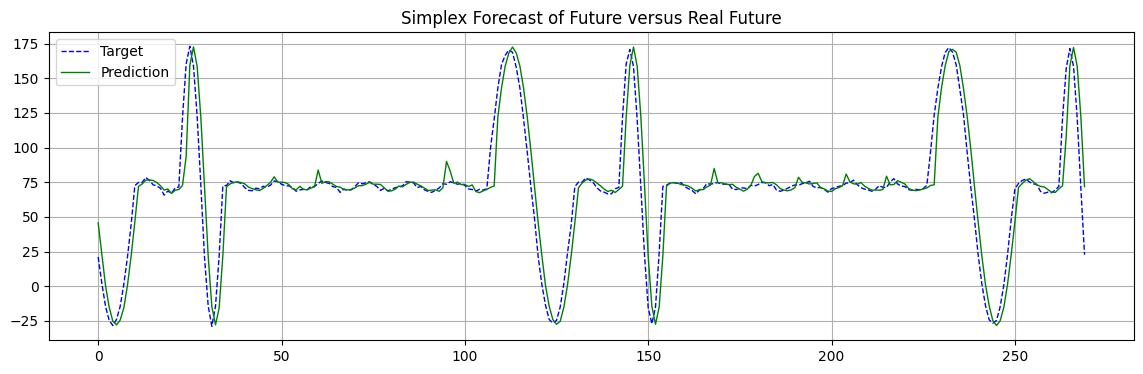

In [119]:
# Run the Simplex Algorithm to predict next # steps
steps = len(true_future)
predicted_future = rolling_simplex_forecast(X_vals, embedding_dim=4, k=4, steps=steps)

# Evaluation of predicted future versus real future
print("Simplex MSE:", mean_squared_error(true_future, predicted_future)/steps)
print("Simplex MAPE:", mean_absolute_percentage_error(true_future, predicted_future))

plt.figure(figsize=(14, 4))
plt.plot(true_future, label='Target', color='blue', linestyle='--', linewidth=1)
plt.plot(predicted_future, label='Prediction', color='green', linestyle='-', linewidth=1)
plt.title("Simplex Forecast of Future versus Real Future")
plt.legend()
plt.grid(True)
plt.show()

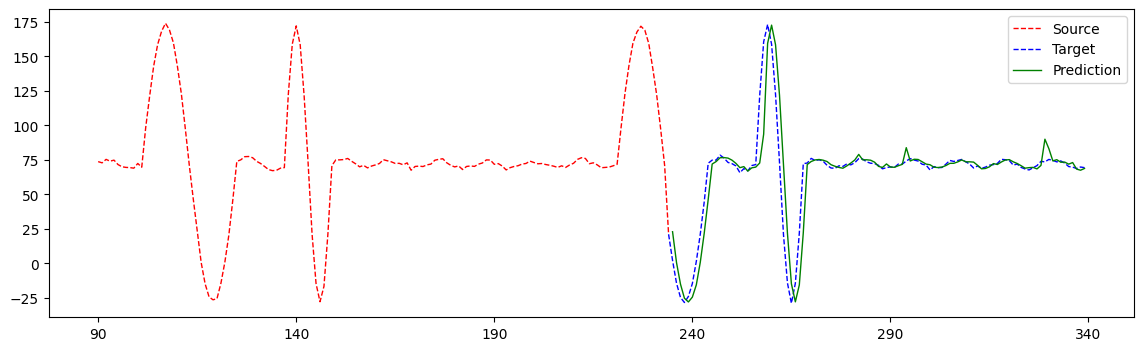

In [121]:
time_index = np.arange(len(X_step))
part_of_past_series = past_time[start_idx:]
part_of_past_series = np.append(part_of_past_series, true_future[:1])

plt.figure(figsize=(14, 4))
plt.plot(time_index[start_idx:now+1], part_of_past_series, label='Source', color='red', linestyle='--', linewidth=1)
plt.plot(time_index[now:start_idx + len_idx], true_future[:(start_idx+len_idx-now)], label='Target', color='blue', linestyle='--', linewidth=1)
plt.plot(time_index[now+1:start_idx + len_idx], predicted_future[1:(start_idx+len_idx-now)], label='Prediction', color='green', linestyle='-', linewidth=1)
plt.xticks(ticks=list(range(start_idx, start_idx + 300, 50)), labels=list(range(90, 380, 50)))
plt.legend()
plt.grid(False)
plt.show()

In [104]:
true_future.shape

(269,)

In [111]:
len(part_of_past_series)

145

In [112]:
len(true_future[:1])

1

In [114]:
new = np.append(part_of_past_series, true_future[:1])

In [115]:
len(new)

146

In [116]:
print(len(time_index[start_idx:now+1]))

146
